In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
%pylab inline

pylab.rcParams['figure.figsize'] = (30, 20)

Populating the interactive namespace from numpy and matplotlib


In [133]:
data = pd.read_csv('loan_prediction.csv')

In [134]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [135]:
data.shape

(614, 13)

In [136]:
cat_columns = set(data.select_dtypes(include=['object']).columns)-set(['Loan_ID'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f125fb0d7b8>,
      dtype=object)

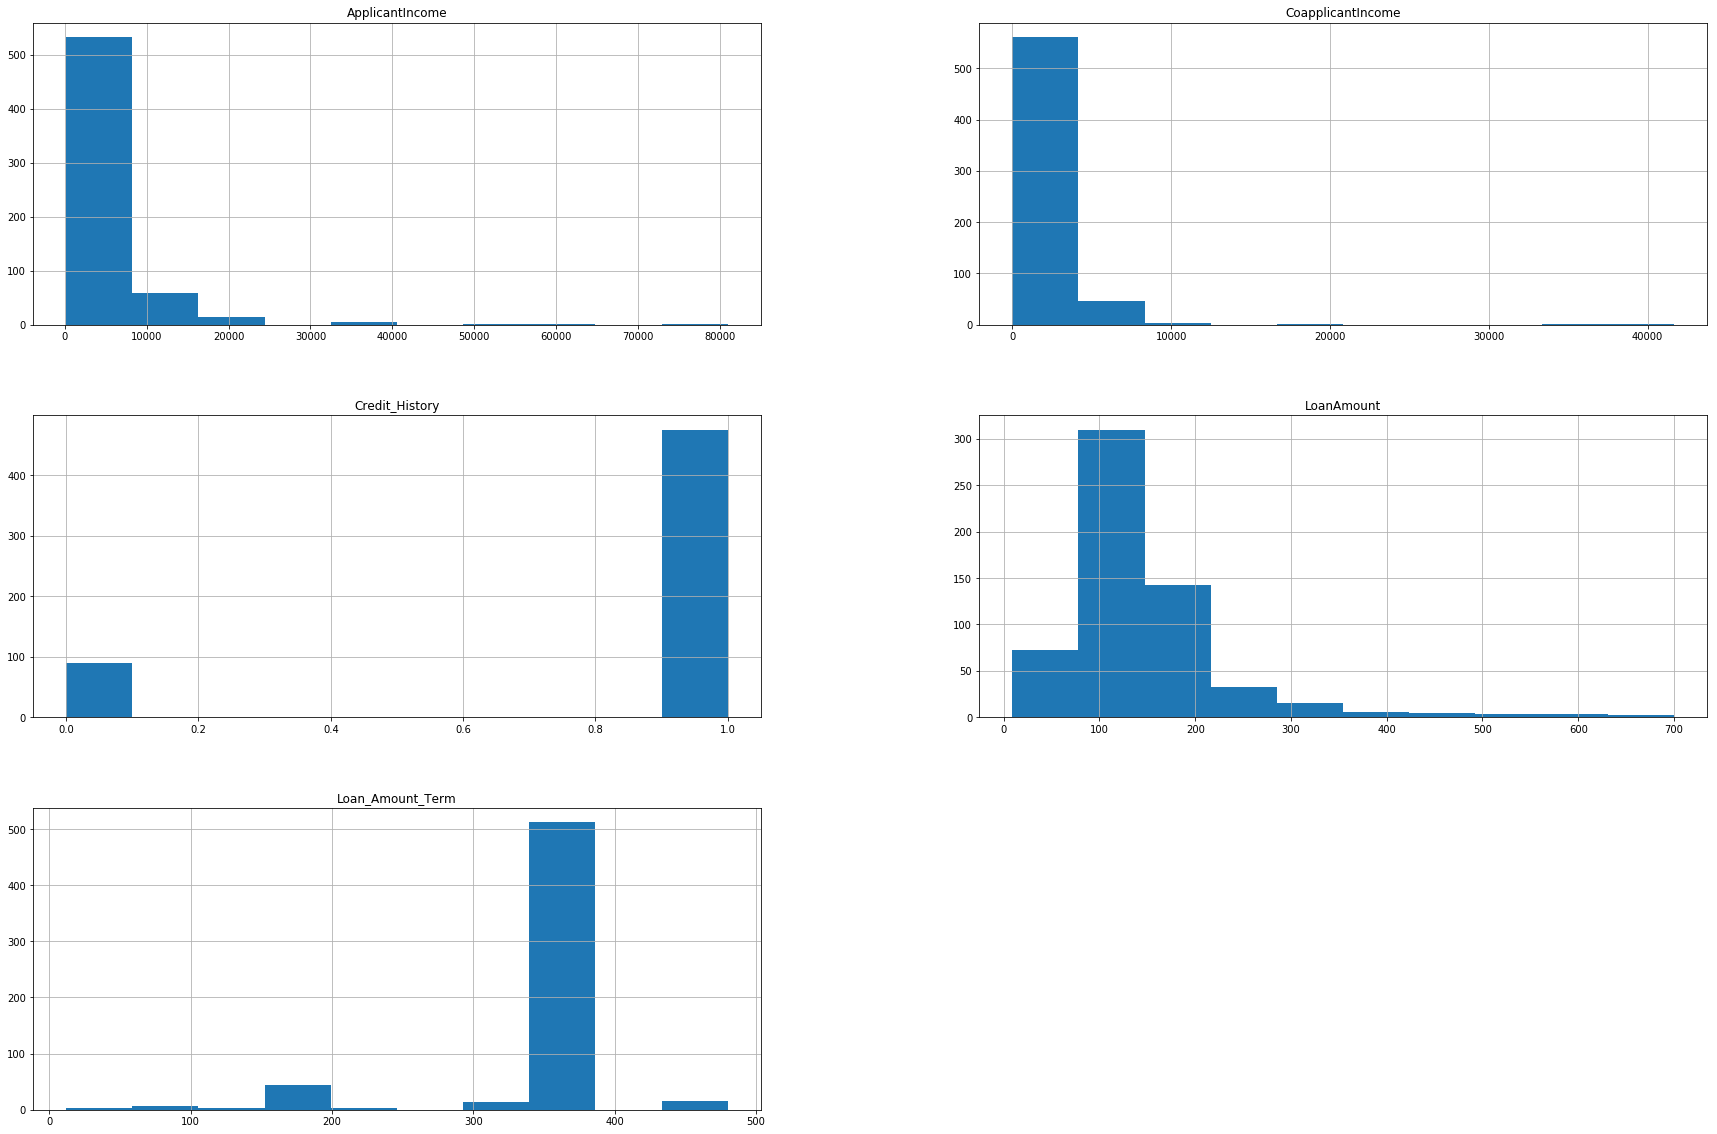

In [137]:
data[list(data.select_dtypes(include=['float']).columns)+list(['ApplicantIncome'])].hist()

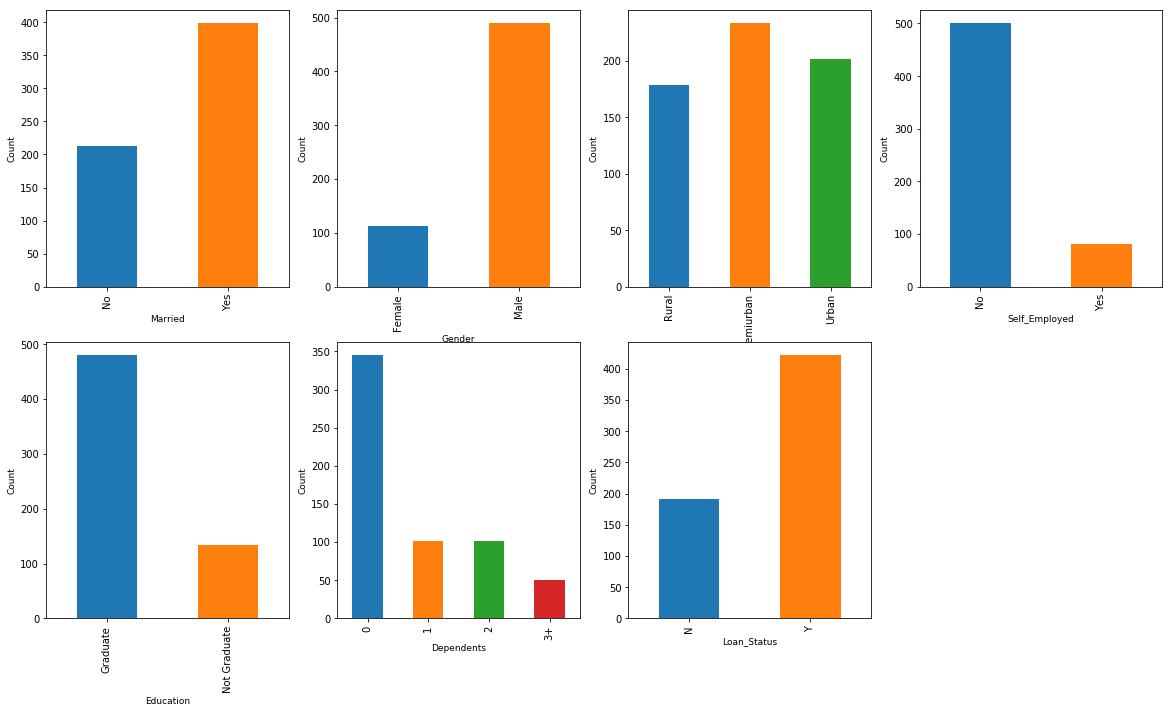

In [138]:
fig = plt.figure(figsize=(20,60))
ax=1

for x in cat_columns:
    ax1 = fig.add_subplot(10,4,ax)
    ax1 = data.groupby(x).size().plot(kind='bar')
    plt.xlabel(x, fontsize=9)
    plt.ylabel('Count', fontsize=9)
    ax+=1

In [139]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [140]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [141]:
data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [142]:
pd.cut(data.ApplicantIncome,25).value_counts()

(3384.0, 6618.0]      263
(69.15, 3384.0]       241
(6618.0, 9852.0]       54
(9852.0, 13086.0]      22
(13086.0, 16320.0]     12
(16320.0, 19554.0]      9
(19554.0, 22788.0]      5
(38958.0, 42192.0]      2
(77766.0, 81000.0]      1
(35724.0, 38958.0]      1
(32490.0, 35724.0]      1
(61596.0, 64830.0]      1
(48660.0, 51894.0]      1
(22788.0, 26022.0]      1
(58362.0, 61596.0]      0
(71298.0, 74532.0]      0
(68064.0, 71298.0]      0
(64830.0, 68064.0]      0
(51894.0, 55128.0]      0
(55128.0, 58362.0]      0
(29256.0, 32490.0]      0
(74532.0, 77766.0]      0
(42192.0, 45426.0]      0
(45426.0, 48660.0]      0
(26022.0, 29256.0]      0
Name: ApplicantIncome, dtype: int64

In [143]:
# Below 4 cells for LoanAmount filling
# data.ApplicantIncome.hist()

data['AppIncomeRanges']=pd.cut(data.ApplicantIncome,25)
data['AppIncomeRanges']=data['AppIncomeRanges'].astype(str)
dict(data.groupby('AppIncomeRanges').LoanAmount.mean())


{'(13086.0, 16320.0]': 198.1818181818182,
 '(16320.0, 19554.0]': 274.55555555555554,
 '(19554.0, 22788.0]': 545.0,
 '(22788.0, 26022.0]': 370.0,
 '(32490.0, 35724.0]': 260.0,
 '(3384.0, 6618.0]': 140.22265625,
 '(35724.0, 38958.0]': 152.0,
 '(38958.0, 42192.0]': 360.0,
 '(48660.0, 51894.0]': 700.0,
 '(61596.0, 64830.0]': 490.0,
 '(6618.0, 9852.0]': 196.1764705882353,
 '(69.15, 3384.0]': 111.45689655172414,
 '(77766.0, 81000.0]': 360.0,
 '(9852.0, 13086.0]': 239.66666666666666}

In [144]:
data.loc[data.LoanAmount.isnull(),'LoanAmount'] = data[data.LoanAmount.isnull()].AppIncomeRanges.apply(lambda x:dict(data.groupby('AppIncomeRanges').LoanAmount.mean())[x])

In [145]:
data[['ApplicantIncome','LoanAmount']].head()

,ApplicantIncome,LoanAmount
0,5849,140.222656
1,4583,128.000000
2,3000,66.000000
3,2583,120.000000
4,6000,141.000000


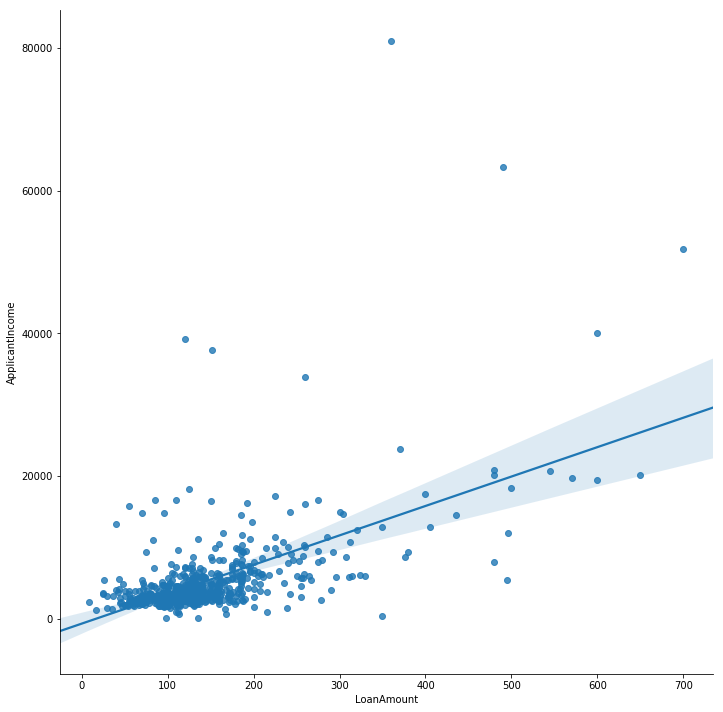

In [146]:
sns.pairplot(data,x_vars='LoanAmount',y_vars='ApplicantIncome',size=10,kind='reg')
data.drop('AppIncomeRanges',axis=1,inplace=True)

In [147]:
# sns.pairplot(data.fillna(0))
# data.dtypes

In [148]:
label_mapper = defaultdict(LabelEncoder)

for col in cat_columns:
    print(col)
    data[col] = label_mapper[col].fit_transform(data[col].fillna(data[col].mode()[0]))

Married
Gender
Property_Area
Self_Employed
Education
Dependents
Loan_Status


In [149]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [150]:
# data.LoanAmount.fillna(data.LoanAmount.mean(skipna=True), inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mode()[0], inplace=True)
data.Credit_History.fillna(data.Credit_History.mode()[0], inplace=True)

In [151]:
X = data.drop(['Loan_ID','Loan_Status'],axis=1)
y = data.Loan_Status

In [152]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,140.222656,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


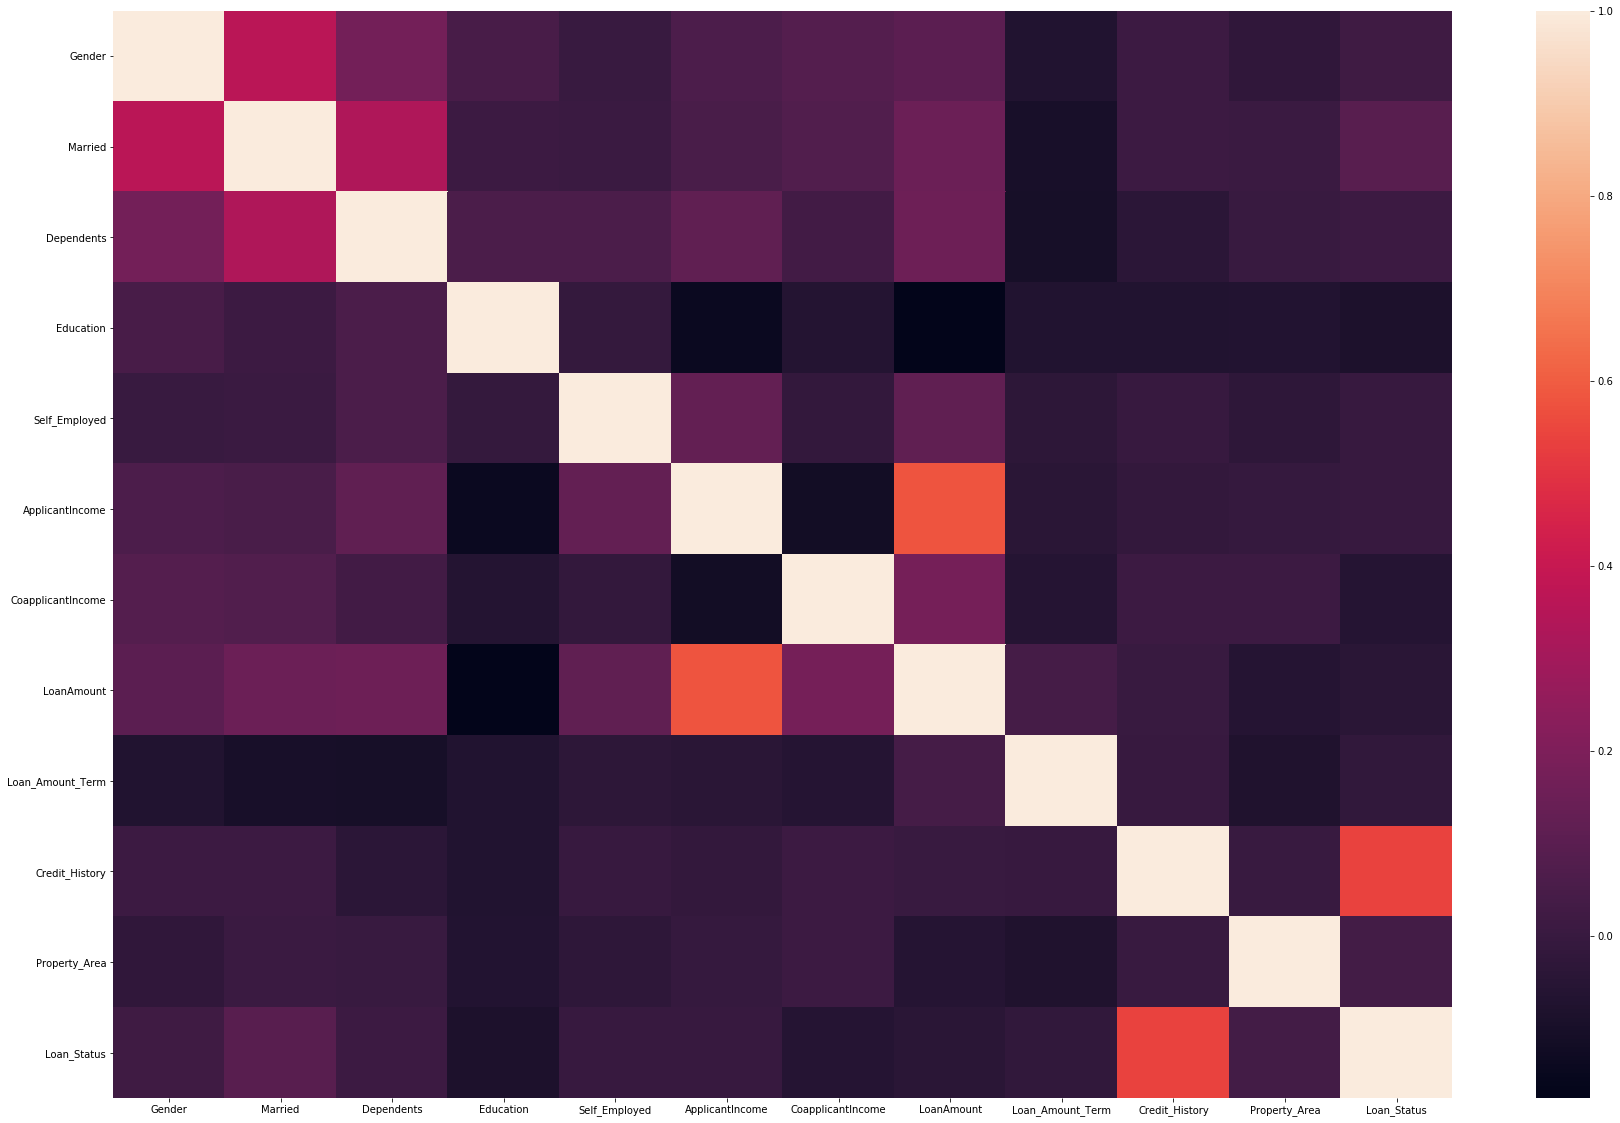

In [153]:
sns.heatmap(data.corr())

In [154]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.ensemble import RandomForestClassifier  #RF algorithm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation, metrics   #Additional sklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import matplotlib.pylab as plt
import numpy as np
from sklearn import metrics
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

scores = []

def modelfit(alg, dtrain, y, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain, y)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    print(pd.Series(dtrain_predictions).value_counts())
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain, y, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(y.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob))
    print(metrics.confusion_matrix(y.values, dtrain_predictions))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, dtrain.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        
        
def evaluate(actual, pred, pred_prob):
    print("accuracy_score")
    print(metrics.accuracy_score(actual, pred))
    
    print("\nNull accuracy")
    print((y_test.value_counts().head(1) / len(y_test)).values[0])
    
    print("\nconfusion matrix")
    confusion = metrics.confusion_matrix(actual, pred)
    print(confusion)
    
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    print("\nSensitivity")
    print(TP / float(TP + FN))
    
    print("\nSpecificity")
    print(TN / float(TN + FP))
    
    print("\nPrecision")
    print(TP / float(TP + FP))
    
    auc_score = metrics.roc_auc_score(actual, pred_prob)
    print("\nAUC Score: %f" % auc_score)
    
    fpr, tpr, thresholds = metrics.roc_curve(actual, pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    
    return auc_score

In [155]:
X = pd.get_dummies(X,columns=['Property_Area'])

In [156]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [157]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_0,Property_Area_1,Property_Area_2
0,1,0,0,0,0,5849,0.0,140.222656,360.0,1.0,0,0,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,0,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,0,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,0,1


In [158]:
lr = LogisticRegression()
modelfit(lr, X_train, y_train,printFeatureImportance=False)

1    418
0     73
dtype: int64

Model Report
Accuracy : 0.8167
AUC Score (Train): 0.788669
[[ 66  83]
 [  7 335]]
CV Score : Mean - 0.7598862 | Std - 0.03002247 | Min - 0.7215686 | Max - 0.810628


In [159]:
# scores.append(lr.score(X_test,y_test))

accuracy_score
0.7886178861788617

Null accuracy
0.6504065040650406

confusion matrix
[[18 25]
 [ 1 79]]

Sensitivity
0.9875

Specificity
0.4186046511627907

Precision
0.7596153846153846

AUC Score: 0.773547


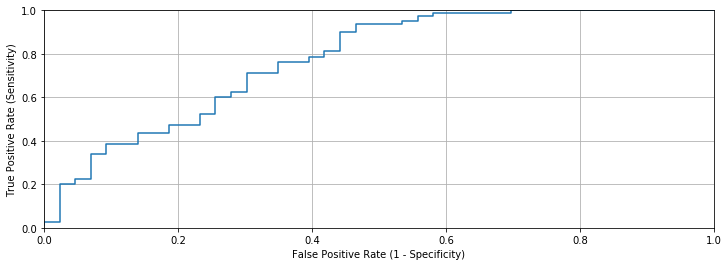

In [160]:
pred_proba = lr.predict_proba(X_test)[:, 1]
scores.append(evaluate(y_test, lr.predict(X_test), pred_proba))

1    340
0    151
dtype: int64

Model Report
Accuracy : 0.9878
AUC Score (Train): 0.999225
[[147   2]
 [  4 338]]
CV Score : Mean - 0.7625441 | Std - 0.03198885 | Min - 0.7345411 | Max - 0.8142512


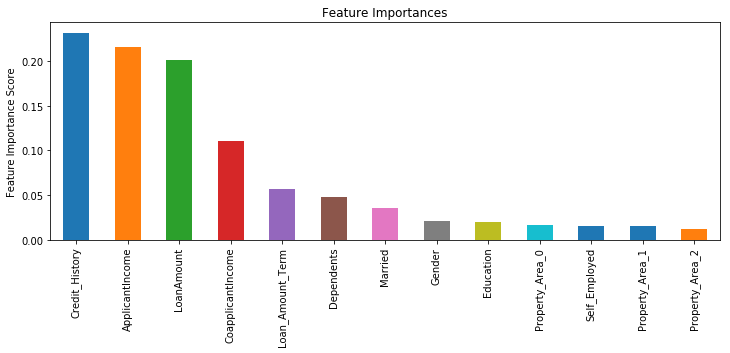

In [161]:
rfm = RandomForestClassifier()
modelfit(rfm, X_train, y_train)

In [162]:
# scores.append(rfm.score(X_test,y_test))

accuracy_score
0.7235772357723578

Null accuracy
0.6504065040650406

confusion matrix
[[19 24]
 [10 70]]

Sensitivity
0.875

Specificity
0.4418604651162791

Precision
0.7446808510638298

AUC Score: 0.716134


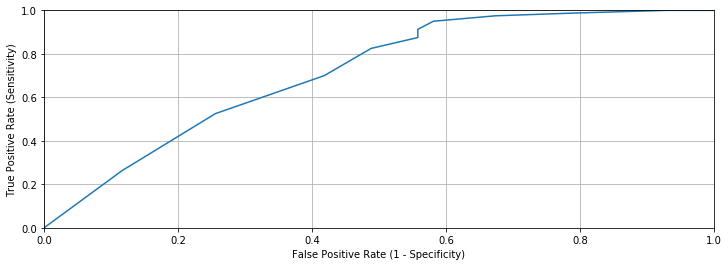

In [163]:
pred_proba = rfm.predict_proba(X_test)[:, 1]
scores.append(evaluate(y_test, rfm.predict(X_test), pred_proba))

1    390
0    101
dtype: int64

Model Report
Accuracy : 0.8941
AUC Score (Train): 0.976667
[[ 99  50]
 [  2 340]]
CV Score : Mean - 0.746906 | Std - 0.03448304 | Min - 0.7043478 | Max - 0.8004831


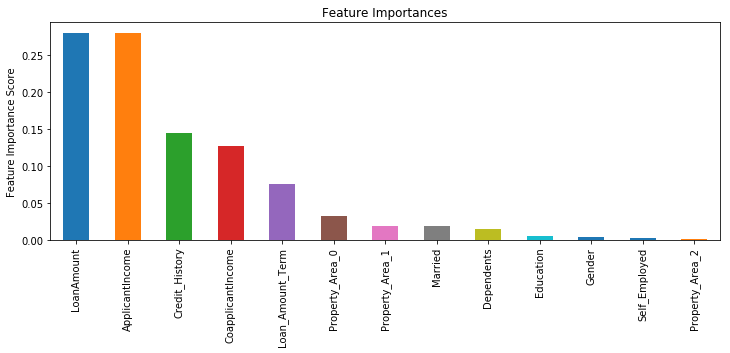

In [164]:
gbm = GradientBoostingClassifier()
modelfit(gbm, X_train, y_train)

In [165]:
# scores.append(gbm.score(X_test,y_test))

accuracy_score
0.7723577235772358

Null accuracy
0.6504065040650406

confusion matrix
[[20 23]
 [ 5 75]]

Sensitivity
0.9375

Specificity
0.46511627906976744

Precision
0.7653061224489796

AUC Score: 0.686919


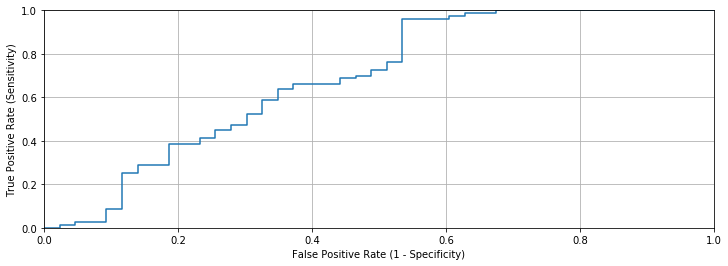

In [166]:
pred_proba = gbm.predict_proba(X_test)[:, 1]
scores.append(evaluate(y_test, gbm.predict(X_test), pred_proba))

1    381
0    110
dtype: int64

Model Report
Accuracy : 0.8921
AUC Score (Train): 0.965874
[[103  46]
 [  7 335]]
CV Score : Mean - 0.7642328 | Std - 0.03611062 | Min - 0.7149758 | Max - 0.8217391


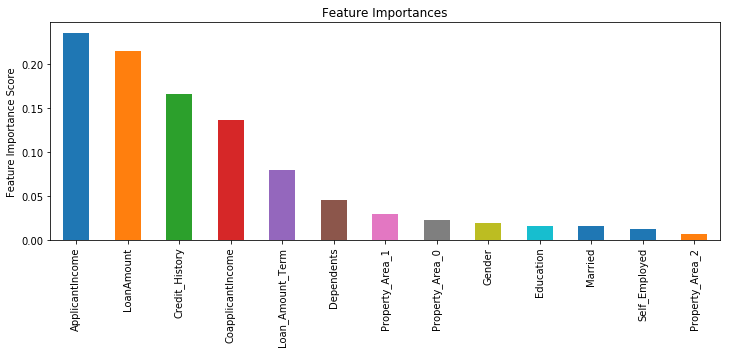

In [167]:
params = {
        'max_depth': 9, 
        'min_samples_split': 105, 
        'learning_rate':0.1, 
        'n_estimators':80, 
        'max_features':'sqrt', 
        'subsample':0.8, 
        'random_state':10
     }
gbm = GradientBoostingClassifier(**params)
modelfit(gbm, X_train, y_train)

In [168]:
# scores.append(gbm.score(X_test,y_test))

accuracy_score
0.7804878048780488

Null accuracy
0.6504065040650406

confusion matrix
[[19 24]
 [ 3 77]]

Sensitivity
0.9625

Specificity
0.4418604651162791

Precision
0.7623762376237624

AUC Score: 0.704942


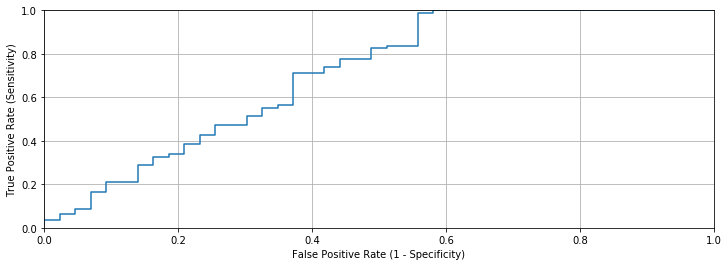

In [169]:
pred_proba = gbm.predict_proba(X_test)[:, 1]
scores.append(evaluate(y_test, gbm.predict(X_test), pred_proba))

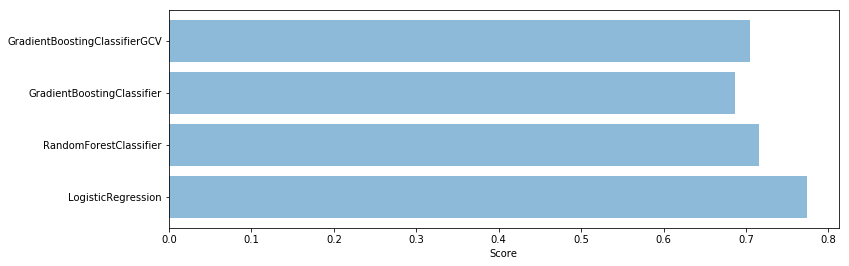

In [170]:
algs = ('LogisticRegression',
'RandomForestClassifier',
'GradientBoostingClassifier',
'GradientBoostingClassifierGCV')

plt.barh(np.arange(4), scores, align='center', alpha=0.5)
plt.yticks(np.arange(4), algs)
plt.xlabel('Score')
plt.show()

In [171]:
scores

[0.773546511627907, 0.7161337209302326, 0.6869186046511628, 0.7049418604651163]

In [172]:
###
##
# GridSearch for GBM

In [173]:
param_test1 = {'n_estimators':list(range(20,81,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=7,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.59802, std: 0.06982, params: {'n_estimators': 20},
  mean: 0.60327, std: 0.06381, params: {'n_estimators': 30},
  mean: 0.59967, std: 0.06228, params: {'n_estimators': 40},
  mean: 0.59296, std: 0.05441, params: {'n_estimators': 50},
  mean: 0.58527, std: 0.05084, params: {'n_estimators': 60},
  mean: 0.60405, std: 0.07257, params: {'n_estimators': 70},
  mean: 0.60606, std: 0.07505, params: {'n_estimators': 80}],
 {'n_estimators': 80},
 0.6060609646157313)

In [174]:
param_test2 = {'max_depth':list(range(5,16,2)), 'min_samples_split':list(range(5,500,50))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.01, n_estimators=80, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)

gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.78192, std: 0.03825, params: {'max_depth': 5, 'min_samples_split': 5},
  mean: 0.78487, std: 0.03452, params: {'max_depth': 5, 'min_samples_split': 55},
  mean: 0.78499, std: 0.03670, params: {'max_depth': 5, 'min_samples_split': 105},
  mean: 0.78541, std: 0.03508, params: {'max_depth': 5, 'min_samples_split': 155},
  mean: 0.78528, std: 0.03349, params: {'max_depth': 5, 'min_samples_split': 205},
  mean: 0.78305, std: 0.03351, params: {'max_depth': 5, 'min_samples_split': 255},
  mean: 0.78680, std: 0.03767, params: {'max_depth': 5, 'min_samples_split': 305},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 5, 'min_samples_split': 355},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 5, 'min_samples_split': 405},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 5, 'min_samples_split': 455},
  mean: 0.78468, std: 0.04364, params: {'max_depth': 7, 'min_samples_split': 5},
  mean: 0.77846, std: 0.03864, params: {'max_depth': 7, 'min_samples_split': 55},
  mean: 0.